Import Required Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

Load Dataset

In [13]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Preprocessing & Encoding

In [14]:
# Encode categorical features
df['sex'] = LabelEncoder().fit_transform(df['sex'])        # male=1, female=0
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])  # yes=1, no=0
df['region'] = LabelEncoder().fit_transform(df['region'])

# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


 **Visualizations**

BMI vs Charges

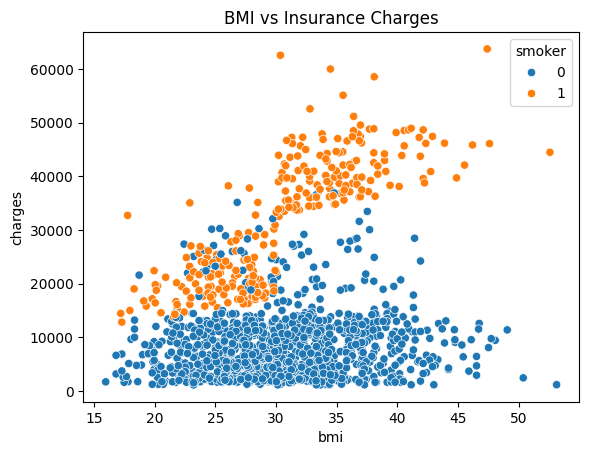

In [15]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Insurance Charges')
plt.show()

Age vs Charges

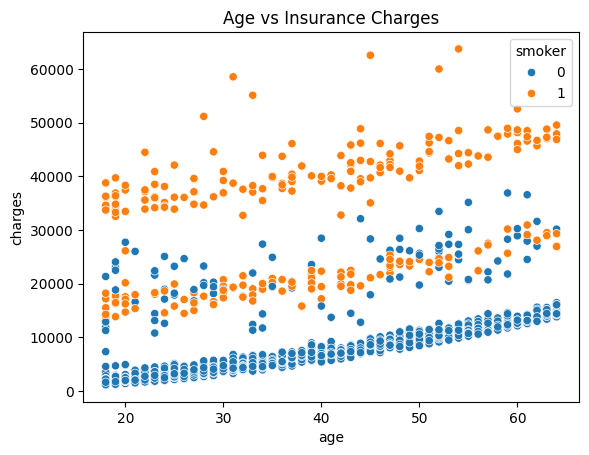

In [16]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Insurance Charges')
plt.show()

Smoking Status vs Charges

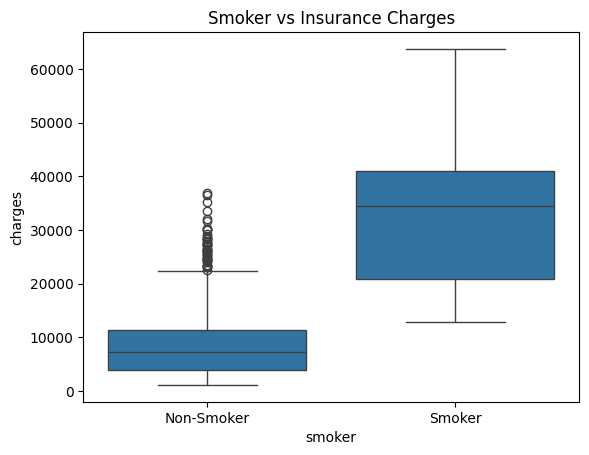

In [17]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Smoker vs Insurance Charges')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

Model Training: Linear Regression

In [18]:
X = df[['age', 'bmi', 'smoker']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Model Evaluation

In [19]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 4260.56
Root Mean Squared Error (RMSE): 5874.76
